In [25]:
#This is the documentation of the visualization for the report of GDV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
#load the data
movies = pd.read_csv('data/ml-latest/movies.csv')

In [27]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
#extract the year from the title
movies['year'] = movies.title.str.extract('(\d\d\d\d)',expand=False)
#convert the year to numeric
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

#put genres in a list
movies['genres'] = movies.genres.str.split('|')

In [29]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0


In [59]:
# explode the genres
movies_exploded = movies.explode('genres')
#remove films without genre
movies_exploded = movies_exploded[movies_exploded.genres != '(no genres listed)']
#for performance reasons we only take movies from 1940 - 2018
#remove films with year greater than 2023
movies_exploded = movies_exploded[movies_exploded.year <= 2018]
#remove movies older than 1900
movies_exploded = movies_exploded[movies_exploded.year >= 1940]


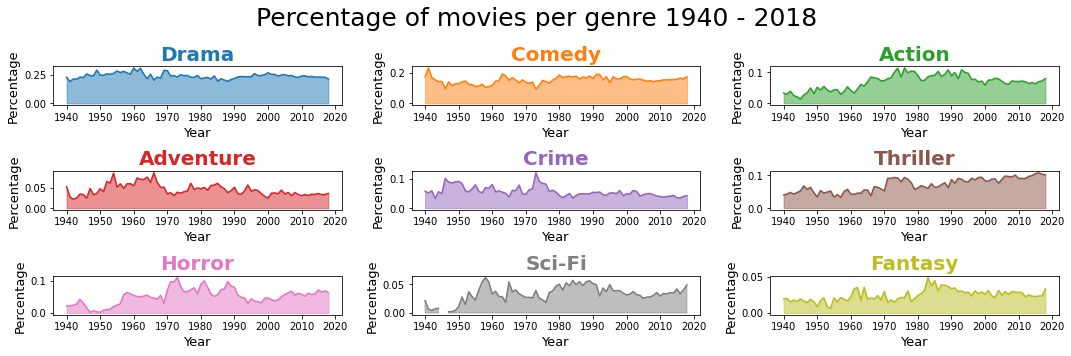

In [90]:
#for performance reasons we only take some genres
genres = ['Drama', 'Comedy', 'Action', 'Adventure', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Fantasy']

#visualize stacked area charts for the genres over the years for each genre a plot

fig, axes = plt.subplots(3, 3, figsize=(15, 5))
for i, genre in enumerate(genres):
    ax = axes[i // 3, i % 3]
    #show the count relative to the total number of movies per year
    movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).plot(ax=ax)
    ax.set_title(genre)
    #make area chart
    ax.fill_between(movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).index, movies_exploded[movies_exploded.genres == genre].groupby('year').count().title.div(movies_exploded.groupby('year').count().title).values, alpha=0.5).set_color('C' + str(i))
    ax.lines[0].set_color('C' + str(i))
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    #make the font of the title bigger and bold and the color the same as the line
    ax.title.set_fontweight('bold')
    ax.title.set_fontsize(20)
    ax.title.set_color('C' + str(i))
    #make the font of the x and y axis labels bigger
    ax.xaxis.label.set_fontsize(13)
    ax.yaxis.label.set_fontsize(13)

#set title of the whole figure
fig.suptitle('Percentage of movies per genre 1940 - 2018', fontsize=25)

#make the plots look nicer
fig.tight_layout()
#change the color of the line of each plot




In [106]:
#remov movies older than 1940 and newer than 2018
movies= movies[movies.year <= 2018]
movies = movies[movies.year >= 1940]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


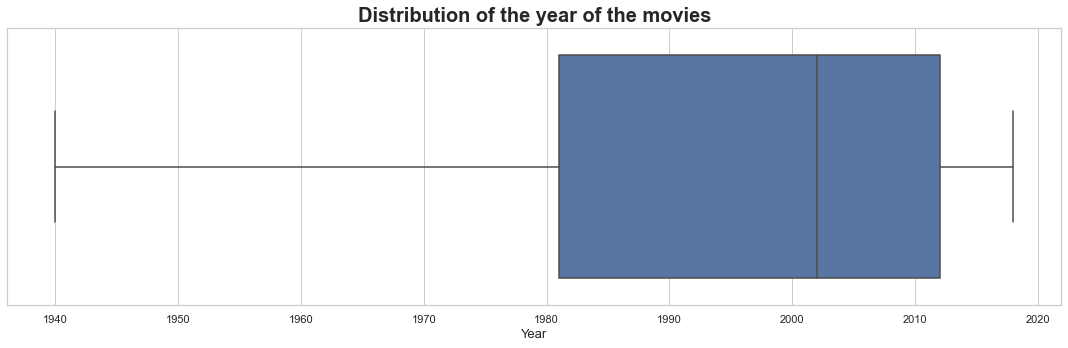

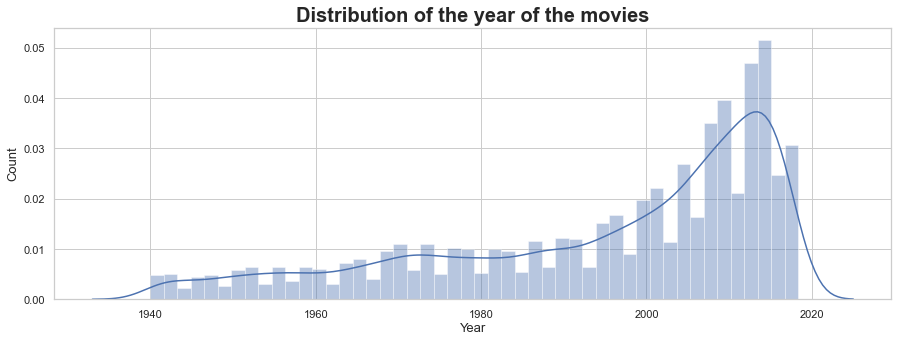

In [120]:
#how are the year distributed is there a normal distribution or a bias
#visualize the distribution of the year with a boxplot
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_theme(style="whitegrid")
sns.boxplot(movies.year, ax=ax)
#set x and y label
ax.set_xlabel('Year')
ax.set_title('Distribution of the year of the movies')
#make the font of the title bigger and bold
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
#make the font of the x and y axis labels bigger
ax.xaxis.label.set_fontsize(13)
#make the plots look nicer
fig.tight_layout()
#set nice color theme


#show the distribution of the year with a histogram and plot a normal distribution
fig, ax = plt.subplots(figsize=(15, 5))
#set the number of bins to 20

#calculate the bins wirh the Freedman-Diaconis rule
#https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

binWidth = 2 * (movies.year.quantile(0.75) - movies.year.quantile(0.25)) * (movies.year.count() ** (-1/3))
bins = np.arange(movies.year.min(), movies.year.max() + binWidth, binWidth)

sns.distplot(movies.year, bins=bins, ax=ax)
#set x and y label
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Distribution of the year of the movies')
#make the font of the title bigger and bold
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
#make the font of the x and y axis labels bigger
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)

    